In [218]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('euronumber.csv',delimiter=',', index_col='date',parse_dates=['date'])

In [219]:
df.head()

,n1,n2,n3,n4,n5,s1,s2
date,,,,,,,
2012-03-23,5,8,21,37,46,6,8
2012-03-30,5,7,12,19,26,1,5
2012-06-04,7,8,34,36,38,4,5
2012-04-13,5,11,12,27,32,1,3
2012-04-20,10,16,30,41,45,2,8


In [220]:
print(df.columns.tolist())

['n1', 'n2', 'n3', 'n4', 'n5', 's1', 's2']


In [221]:
df['n1'].head()

date
2012-03-23     5
2012-03-30     5
2012-06-04     7
2012-04-13     5
2012-04-20    10
Name: n1, dtype: int64

Text(0, 0.5, 'Count')

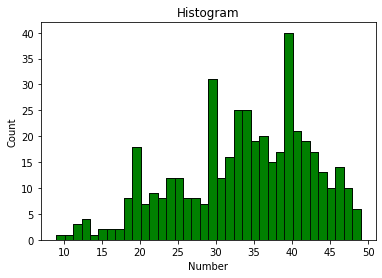

In [222]:
plt.hist(df['n4'], color = 'green', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(df['n4'], hist=True, kde=False, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram')
plt.xlabel('Number')
plt.ylabel('Count')

In [420]:
data = pd.DataFrame(df['n5'])
data = data.reset_index()


In [421]:
data['date'] = data.index

In [422]:
data[:5]

,date,n5
0,0,46
1,1,26
2,2,38
3,3,32
4,4,45


In [423]:
X = data.iloc[:,0]   
y = data.iloc[:,-1]

In [424]:
X

0        0
1        1
2        2
3        3
4        4
      ... 
438    438
439    439
440    440
441    441
442    442
Name: date, Length: 443, dtype: int64

In [425]:
y[:5]

0    46
1    26
2    38
3    32
4    45
Name: n5, dtype: int64

In [426]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.80, random_state=20)  

In [427]:
Xtrain = Xtrain.values.reshape(-1, 1)
Xtest = Xtest.values.reshape(-1, 1)

In [428]:
Xtrain[:5]

array([[171],
       [388],
       [268],
       [ 31],
       [428]], dtype=int64)

In [429]:
Xtest[:5]

array([[160],
       [416],
       [433],
       [343],
       [287]], dtype=int64)

In [430]:
ytest[:5]

160    33
416    42
433    29
343    48
287    47
Name: n5, dtype: int64

In [431]:
model_lr = LogisticRegression(C=1)
model_lr.fit(Xtrain, ytrain)

C:\Users\clara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [432]:
ypred = model_lr.predict([[443]])

In [433]:
ypred

array([49], dtype=int64)